### Import the dependencies

In [25]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import tensorflow.keras
import pandas as pd
import numpy as np

In [2]:
from IPython.display import HTML

In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

### Data splitting

In [33]:
import os
import numpy as np
import shutil
import random
root_dir = './Dataset_agriculture/' # data root path
classes_dir = ['Bacterialblight','Blast','Brownspot','Healthy','Hispa','LeafBlast','Tungro'] #total labels

In [34]:
val_ratio = 0.1   # 10% of data for validation
test_ratio = 0.1  # 10% of data for testing 
# use splitfolders library to split the data to train,test,validation.size of the training data 80%.
import splitfolders
splitfolders.ratio('./Dataset_agriculture', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 2530 files [00:07, 326.00 files/s]


### Data Agumentation

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#performing the data agumentation to flip,rescale,rotation of images to extract the feature for training data.
ImageDataGenerator_train= ImageDataGenerator(rescale=1./255,rotation_range=10,horizontal_flip=True)
Generated_train= ImageDataGenerator_train.flow_from_directory('output/train',target_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=32,
        class_mode="sparse",
)

Found 2021 images belonging to 7 classes.


In [22]:
class_names=list(Generated_train.class_indices.keys())

In [23]:
class_names

['Bacterialblight',
 'Blast',
 'Brownspot',
 'Healthy',
 'Hispa',
 'LeafBlast',
 'Tungro']

In [30]:
ImageDataGenerator_validation = ImageDataGenerator(rescale=1./255,rotation_range=10,horizontal_flip=True)
#performing the data agumentation to flip,rescale,rotation of images to extract the feature for validation data.
Generated_validation = ImageDataGenerator_validation.flow_from_directory('output/val',target_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=32,
        class_mode="sparse"
)

Found 249 images belonging to 7 classes.


In [31]:
ImageDataGenerator_test = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
#performing the data agumentation to flip,rescale,rotation of images to extract the feature for test data.
Generated_test= ImageDataGenerator_test.flow_from_directory(
        'output/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 260 images belonging to 7 classes.


### Model Building

In [9]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
classes_count =7 # No of class for classification
# Build the CNN Model with convolutional layers for feature extraction and add a softmax layer for classification 
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(classes_count, activation='softmax'),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [11]:
'''compile the model created above with loss as SparseCategoricalCrossentropy ,optimizer in backpropagation is adam ,
   metrics used accuracy.'''
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
batch_size=32
history = model.fit(
    Generated_train,  #pass train dataset as a input
    steps_per_epoch=47,
    batch_size=batch_size, # Size of the images to send in every epoch.
    validation_data=Generated_validation,   # Data for valdation
    validation_steps=6, 
    verbose=1,
    epochs=35,   # Running the model for 35 times 
)

Epoch 1/35
47/47 [==============================] - 117s 2s/step - loss: 1.6072 - accuracy: 0.3225 - val_loss: 1.2849 - val_accuracy: 0.4479
Epoch 2/35
47/47 [==============================] - 112s 2s/step - loss: 1.1663 - accuracy: 0.4997 - val_loss: 1.2849 - val_accuracy: 0.4479
Epoch 3/35
47/47 [==============================] - 113s 2s/step - loss: 0.9775 - accuracy: 0.5714 - val_loss: 0.9741 - val_accuracy: 0.6094
Epoch 4/35
47/47 [==============================] - 118s 3s/step - loss: 1.0087 - accuracy: 0.5485 - val_loss: 1.0524 - val_accuracy: 0.5469
Epoch 5/35
47/47 [==============================] - 118s 3s/step - loss: 0.9597 - accuracy: 0.5599 - val_loss: 0.9682 - val_accuracy: 0.5573
Epoch 6/35
47/47 [==============================] - 124s 3s/step - loss: 0.8866 - accuracy: 0.6097 - val_loss: 0.9514 - val_accuracy: 0.6042
Epoch 7/35
47/47 [==============================] - 124s 3s/step - loss: 0.8318 - accuracy: 0.6588 - val_loss: 0.8607 - val_accuracy: 0.6458
Epoch 8/35
47

In [13]:
scores = model.evaluate(Generated_test)

9/9 [==============================] - 11s 1s/step - loss: 0.4582 - accuracy: 0.8269


In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

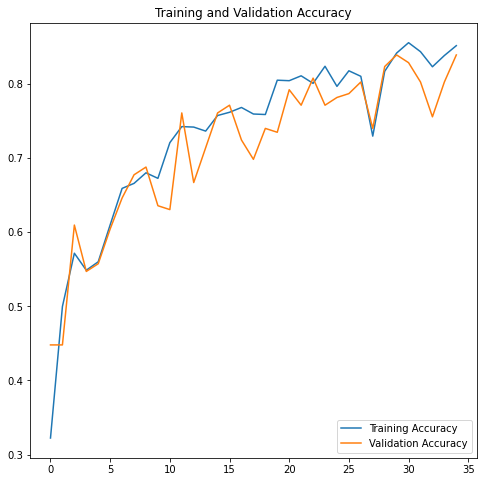

In [16]:
EPOCHS =35
plt.figure(figsize=(8, 8))
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

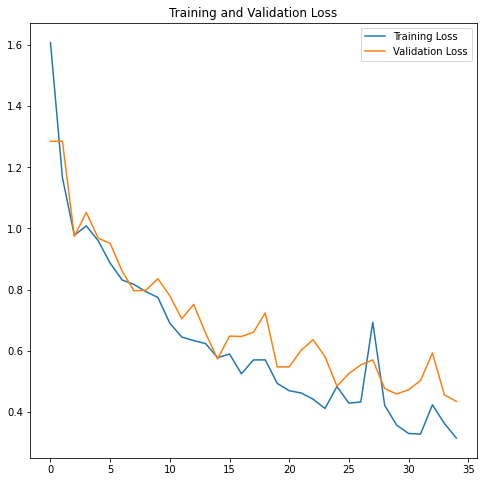

In [17]:
plt.figure(figsize=(8, 8))
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Testing the Data

In [18]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])] # calculate the class to whics it's belongs.
    confidence = round(100 * (np.max(predictions[0])), 2) #calculate the confidence (accuracy)
    return predicted_class, confidence

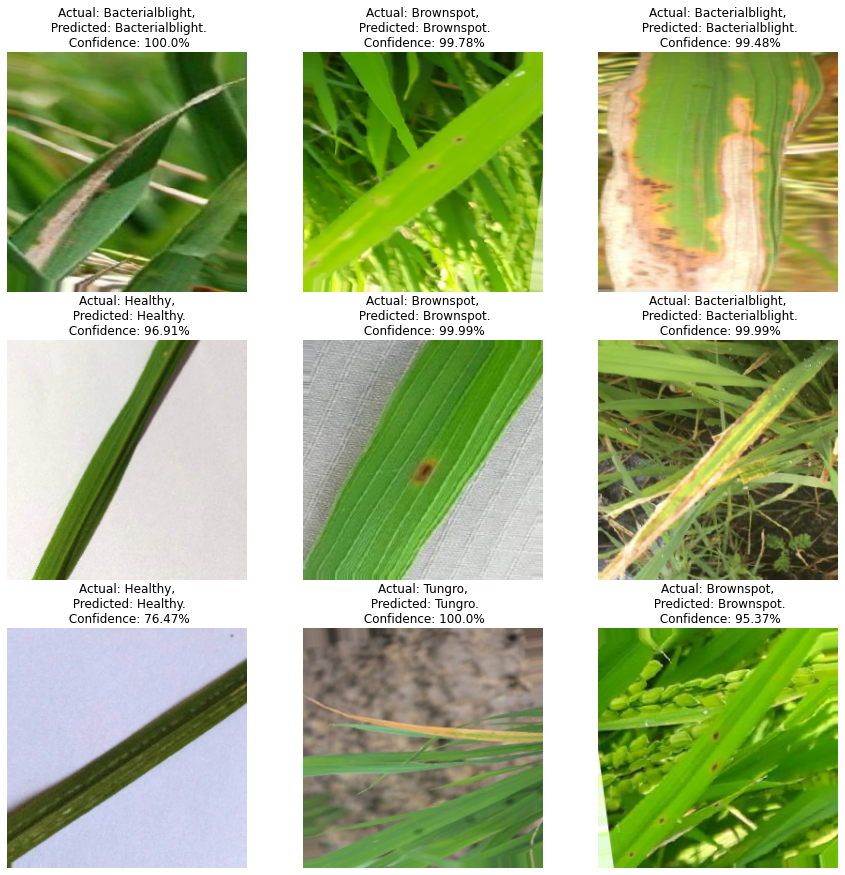

In [35]:
plt.figure(figsize=(15, 15))
for images, labels in Generated_test:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1) #create subplots to display images with labels.
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Save Model

In [28]:
model.save("./Rice_disease_classification1.h5")